In [1]:
#!pip install plotly --upgrade
#!pip install ipywidgets

# basic function

In [2]:
import matplotlib.pyplot as plt
import random
import cv2

def plot_lines_on_map(lines, color1=None, title=None, image=None):
    if image is None:
        fondo = "/serverstorage/dataset_tailandia/Tailandia 001.jpg"
        fondo = cv2.imread(fondo)
    else:
        fondo = 255*np.ones([2000, 2000, 3], np.uint8)
    
    if color1 is None:
        color1 = (random.random(), random.random(), random.random())

    if title is None:
        title = 'Líneas en el mapa'

    # Graficar las líneas en el mapa
    for line_points in lines:
        # Extraer las coordenadas de latitud y longitud de cada punto en la línea
        latitudes, longitudes = zip(*line_points)
        
        # Graficar la línea usando matplotlib
        plt.plot(longitudes, latitudes, color=color1, marker='o')

    # Guardar el gráfico de matplotlib
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.imshow(fondo)
    plt.title(title)
    plt.grid(True)
    plt.savefig('lineas_en_mapa.png')
    plt.show()


# Example data for three lines with different points
line1 = [(0, 0), (1, 1), (2, 2), (3, 3)]
line2 = [(4, 4), (5, 5), (6, 6)]
line3 = [(7, 7), (8, 8), (9, 9), (10, 10), (11, 11)]

# Plot the lines on the map
lines_to_plot = [line1, line2, line3]
plot_lines_on_map(lines_to_plot)

# read data features for each vehicle and save in file each coodinates

In [3]:
import pandas as pd

ruta_archivo_csv = "/serverstorage/dataset_tailandia/0001.csv"
dataframe = pd.read_csv(ruta_archivo_csv)

dataframe.head()

Unnamed: 0  quadrants  time  original_coordinate_x  original_coordinate_y  \
0           0          4     1                   1113                    992   
1           1          4     2                   1115                    992   
2           2          4     3                   1107                    997   
3           3          4     4                   1102                   1005   
4           4          4     5                   1100                   1015   

   distances  x_distances  y_distances  distances_ref  x_distances_ref  ...  \
0       4.47           -4            2         928.59              -33  ...   
1       2.00            2            0         928.66              -35  ...   
2       9.43           -8            5         923.39              -27  ...   
3       9.43           -5            8         915.26              -22  ...   
4      10.20           -2           10         905.22              -20  ...   

   x_velocities_ref  y_velocities_ref  aceleration  x_aceleration  \
0             -33.0             928.0        -4.47            4.0   
1             -35.0             928.0         2.47           -6.0   
2             -27.0             923.0        -7.43           10.0   
3             -22.0             915.0         0.00           -3.0   
4             -20.0             905.0        -0.77           -3.0   

   y_aceleration  aceleration_ref  x_aceleration_ref  y_aceleration_ref  \
0           -2.0             2.15               -4.0                2.0   
1            2.0            -0.07                2.0                0.0   
2           -5.0             5.27               -8.0                5.0   
3           -3.0             8.13               -5.0                8.0   
4           -2.0            10.04               -2.0               10.0   

    angle  angle_ref  
0  333.43     272.04  
1    0.00     272.16  
2  327.99     271.68  
3  302.01     271.38  
4  281.31     271.27  

[5 rows x 26 columns]

In [4]:
import pickle
import os
import pandas as pd

if False:
    all_lines = []
    all_names = []
    
    all_dataframe = {} 
    
    directorio = "/serverstorage/dataset_tailandia"
    contenido_directorio = list(sorted([ f for f in os.listdir(directorio) if f.find("csv") > 0 ]))
    
    for file in contenido_directorio:
        
        # Ruta del archivo CSV
        ruta_archivo_csv = directorio + "/" + file
        
        # Leer el archivo CSV y crear un DataFrame
        dataframe = pd.read_csv(ruta_archivo_csv)
        all_dataframe[file.split(".")[0]] = dataframe
    
        line = list(zip( dataframe["original_coordinate_x"], dataframe["original_coordinate_y"] ))
        all_lines.append(line)
        all_names.append(file.split(".")[0])
        
        # Mostrar el DataFrame
        # dataframe.head()
        
    print(len(all_lines), len(all_names))
    with open("/serverstorage/dataset_tailandia/calibration_dataset.pkl", 'wb') as file:
        pickle.dump([all_lines, all_names], file)

# read file with each coordinates

In [5]:
all_lines_saved, all_names_saved = None, None

with open("/serverstorage/dataset_tailandia/calibration_dataset.pkl", 'rb') as archivo:
    all_lines_saved, all_names_saved = pickle.load(archivo)
    
#part_start = 0
#part_end = -1
#all_lines, all_names = all_lines[part_start:part_end],  all_names[part_start:part_end]
    
    
print(len(all_lines_saved), len(all_names_saved))
    
# quitando los que se consideran anomalia

anomalies = {
    "0082": None,
    "0130": None,
    "0317": None,
    "0326": None,
    }

for name_delete in anomalies.keys():
    if name_delete in all_names_saved:
        index = all_names_saved.index(name_delete)
        if index >= 0:
            all_names_saved.remove(name_delete)
            anomalies[name_delete] = all_lines_saved.pop(index)
            print(f"remove {name_delete}")
    
print(len(all_lines_saved), len(all_names_saved))


170 170
remove 0082
remove 0130
remove 0317
remove 0326
166 166


# graph

In [6]:
import cv2
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
from PIL import Image, ImageEnhance
import numpy as np


def print_graph(lineas_semejantes_lista, todas_las_lineas):
    plt.figure(figsize=(20,8))
    
    fondo = "/serverstorage/dataset_tailandia/Tailandia 001.jpg"
    fondo = cv2.imread(fondo, cv2.IMREAD_GRAYSCALE)
    fondo = cv2.cvtColor(fondo, cv2.COLOR_GRAY2BGR)

    radius = 5
    thickness = 5

    for j, group in enumerate(lineas_semejantes_lista):
        color1 = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))

        group_lines = []
        for id in group:
            group_lines.append(todas_las_lineas[id])

        for coordinates in group_lines:

            for i, coordinate in enumerate(coordinates):
                fondo = cv2.circle(fondo, coordinate, radius, color1, thickness)

            for i, coordinate in enumerate(coordinates[:-1]):
                desde = coordinate
                hasta = coordinates[i+1]
                fondo = cv2.line(fondo, desde, hasta , color1, thickness )

    
    plt.title(f'Movimientos actuales del vehiculo')
    plt.imshow(fondo)
    plt.axis('off')
    plt.show()

def export_graph(lineas_semejantes_lista, all_lines, all_names):
    imagen_path = "/serverstorage/dataset_tailandia/Tailandia 001.jpg"
    img = Image.open(imagen_path)
    img = img.convert('L')

    factor_brillo = 1.0  # Puedes ajustar este valor para hacer la imagen más clara o más oscura
    img = ImageEnhance.Brightness(img)
    img = img.enhance(factor_brillo)
    
    img_array = np.array(img)
    img_array = np.stack((img_array,) * 3, axis=-1)

    fig = go.Figure()
    fig.add_trace(go.Image(z=img_array))  # image for background

    for j, group in enumerate(lineas_semejantes_lista):
        line_color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))

        group_lines = []
        group_names = []
        for id in group:
            group_lines.append(all_lines[id])
            group_names.append(all_names[id])

        for i, line_points in enumerate(group_lines):
            x_coords, y_coords = zip(*line_points)
            name = group_names[i]
            fig.add_trace(go.Scatter(x=x_coords, y=y_coords, mode='markers+lines', name=f'{j}-{name}', line=dict(color=f'rgb{line_color}')))

    fig.update_layout(title='Líneas sobre la imagen')
    pyo.plot(fig, filename='/serverstorage/interactive_image2.html')

# ClusterAlgoritmia

In [7]:
from state_machine.State import State



import warnings
warnings.filterwarnings('ignore')


class IndividualAnomaly(State):
    
    def execute(self, **kwargs: dict) -> dict:
        """
        method to execute state for locate vehicles in frame

        @type kwargs: dict
        @param kwargs: dict with data to process
        @param example: a example for input data in file "example_input_kwargs_car_detection.json"

        @rtype: dict
        @returns: dict with data processed, add vehicles in frame if exist
        @return example: a example for output data in file "example_output_kwargs_car_detection.json"
        """  
        
        if not kwargs.get("features"):
            raise Exception("No features in kwargs")

        


        return kwargs

In [8]:
from scipy.spatial.distance import directed_hausdorff
from collections import defaultdict
from itertools import chain


class ClusterAlgoritmia:
    
    lineas_semejantes_lista = []
    trained = False
    
    def __init__(self, sensibility):
        self.sensibility = sensibility
    
    def train(self, all_lines):
        self.all_lines = all_lines.copy()
    
    def predict(self, new_vehicles):
        predictions = []
        for new_vehicle in new_vehicles:
            
            all_lines_class = self.all_lines
            
            self.before = len(all_lines_class)

            if isinstance(new_vehicle, list):
                all_lines_class.append(new_vehicle)
            else:
                print("No se puede predecir ", new_vehicle)
            
            after = len(all_lines_class)
            
            self.lineas_semejantes_lista = self.get_semejantes(all_lines_class, self.sensibility)
            
            self.trained = True

            if isinstance(new_vehicle, list):
                for i, similar_list in enumerate(self.lineas_semejantes_lista):                    
                    if after in similar_list:                    
                        predictions.append(i)   
                    
        return predictions

    def get_semejantes(self, todas_las_lineas, umbral_similitud = 45):
        # Diccionario para almacenar las distancias de Hausdorff entre cada par de líneas
        distancias_hausdorff = {}
    
        # Calcular la distancia de Hausdorff entre cada par de líneas
        for i, linea_a in enumerate(todas_las_lineas):
            for j, linea_b in enumerate(todas_las_lineas):
                if i != j:  # Evitar comparar una línea consigo misma
                    distancia = directed_hausdorff(linea_a, linea_b)[0]
                    distancias_hausdorff[(i, j)] = distancia
    
    
    
        # Encontrar las líneas semejantes basadas en el umbral
        lineas_semejantes = []
        for par, distancia in distancias_hausdorff.items():
            if distancia < umbral_similitud:
                linea_a_idx, linea_b_idx = par
                lineas_semejantes.append((linea_a_idx, linea_b_idx))
    
        # Mostrar el resultado de las líneas semejantes
        pares_semejantes = []
        for idx_a, idx_b in lineas_semejantes:
            # print(f"\tLínea {idx_a + 1} es semejante a Línea {idx_b + 1}")
            pares_semejantes.append([idx_a + 1, idx_b + 1])
            
            
        # *********************************************************************************
        # usando un grafo saco todos los puntos que se unen
    
        
        # Crear un grafo utilizando un diccionario defaultdict
        grafo = defaultdict(list)
        for a, b in pares_semejantes:
            grafo[a].append(b)
            grafo[b].append(a)
    
        
    
        # Encontrar todas las componentes conectadas del grafo
        componentes_conectadas = []
        visitados = set()
        for nodo in grafo:
            if nodo not in visitados:
                componente = self.encontrar_componente_conectada(nodo, grafo)
                componentes_conectadas.append(componente)
                visitados.update(componente)
    
        # Convertir las componentes conectadas en una lista de listas
        lineas_semejantes_lista = [list(componente) for componente in componentes_conectadas]
        
        return lineas_semejantes_lista

    # Función para encontrar la componente conectada desde un nodo dado
    def encontrar_componente_conectada(self, nodo, grafo):
        visitados = set()
        componente = set()
        pila = [nodo]

        while pila:
            actual = pila.pop()
            if actual not in visitados:
                visitados.add(actual)
                componente.add(actual)
                pila.extend(grafo[actual])

        return componente
        
    def brothers(self, cluster):
        if self.trained:        
            conten_cluster = []
            for d in self.lineas_semejantes_lista[cluster]:
                if d < len(self.all_lines):
                    conten_cluster.append(d-1)      
            return conten_cluster
        return []


    @property
    def get_clusters(self):
        temp = []
        for cluster in range(len(self.lineas_semejantes_lista)):
            conten_cluster = self.brothers(cluster)
            temp.append(conten_cluster)
        return temp





# example ClusterAlgoritmia

In [9]:
data_predict = anomalies["0326"]

30.0 [] 12


30.1 [] 12


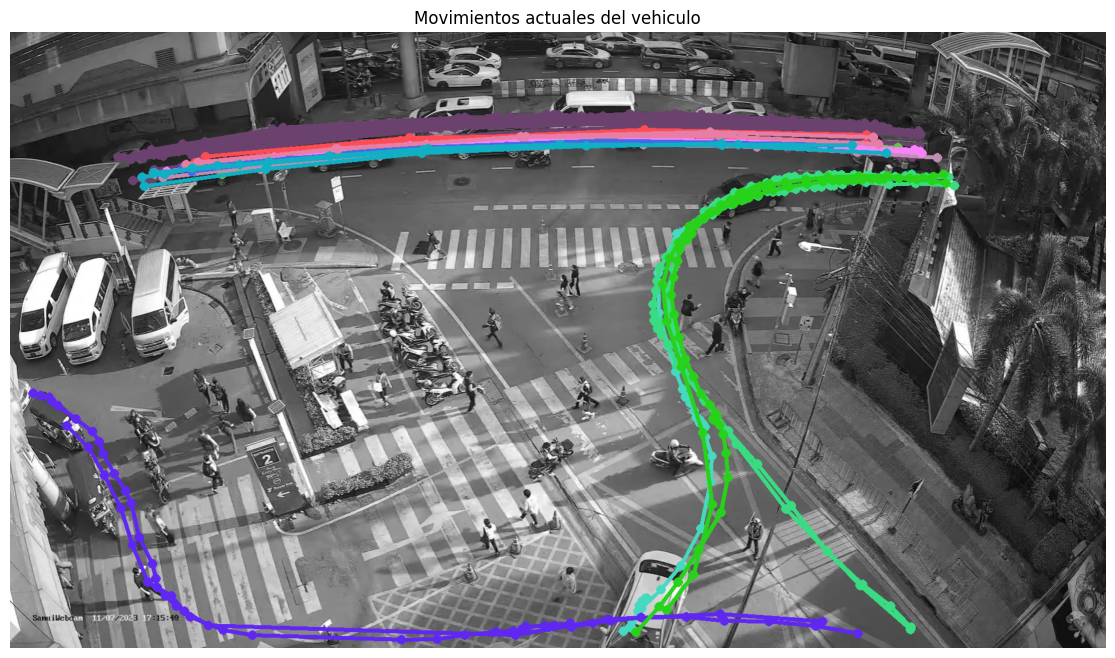

30.2 [] 12


30.3 [] 12


KeyboardInterrupt: 

In [10]:
# 34.4


incremento = 0.1
inicio = 30
fin = 60
for sensibility_ in range(int(inicio * (1 / incremento)), int(fin * (1 / incremento)) + 1):
    
    sensibility = sensibility_/10

    k_william = ClusterAlgoritmia(sensibility=sensibility)
    k_william.train(all_lines_saved)
    
    cluster = k_william.predict([data_predict])
    
    print(sensibility, cluster, len(k_william.get_clusters)-1)
    
    print_graph(k_william.get_clusters, all_lines_saved)

0 4


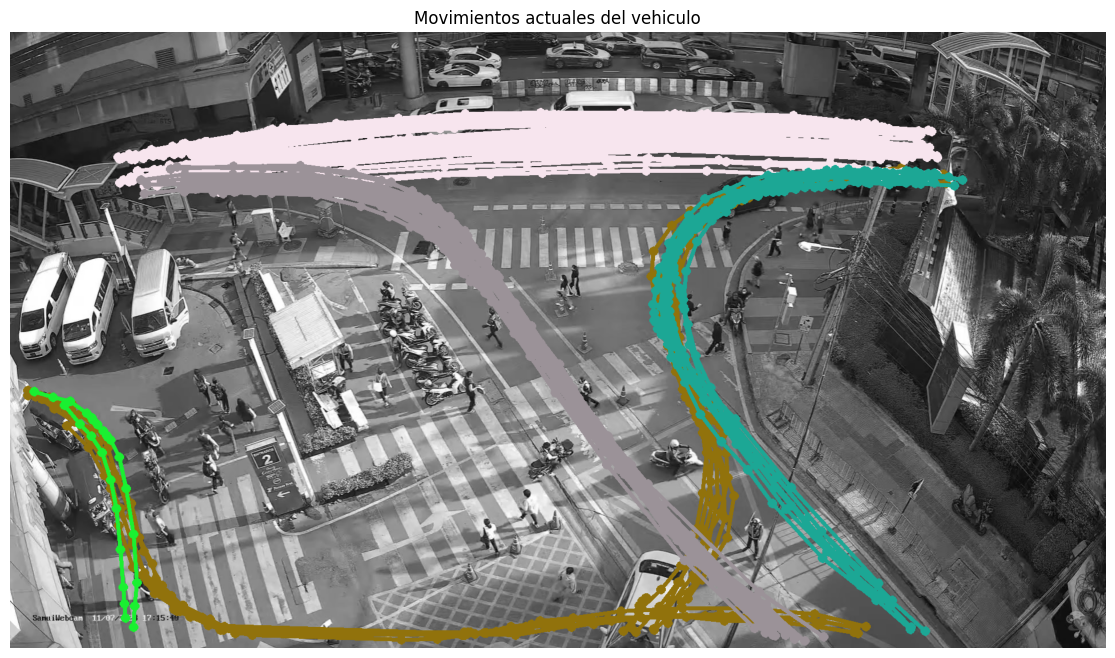

In [11]:


sensibility = 50.0  # High number = less clusters, low number = more cluster

k_william = ClusterAlgoritmia(sensibility=sensibility)
k_william.train(all_lines_saved)

cluster = k_william.predict([data_predict])[0]

print(cluster, len(k_william.get_clusters)-1)

print_graph(k_william.get_clusters, all_lines_saved)

In [12]:


sensibility = 50.0  # High number = less clusters, low number = more cluster





k_william = ClusterAlgoritmia(sensibility=sensibility)
k_william.train(all_lines_saved)

cluster = k_william.predict([data_predict])[0]

print(cluster, len(k_william.get_clusters)-1)

0 4


In [13]:
print(k_william.brothers(cluster))

[0, 1, 2, 67, 105, 83, 84, 21, 20, 151, 152, 147, 27]


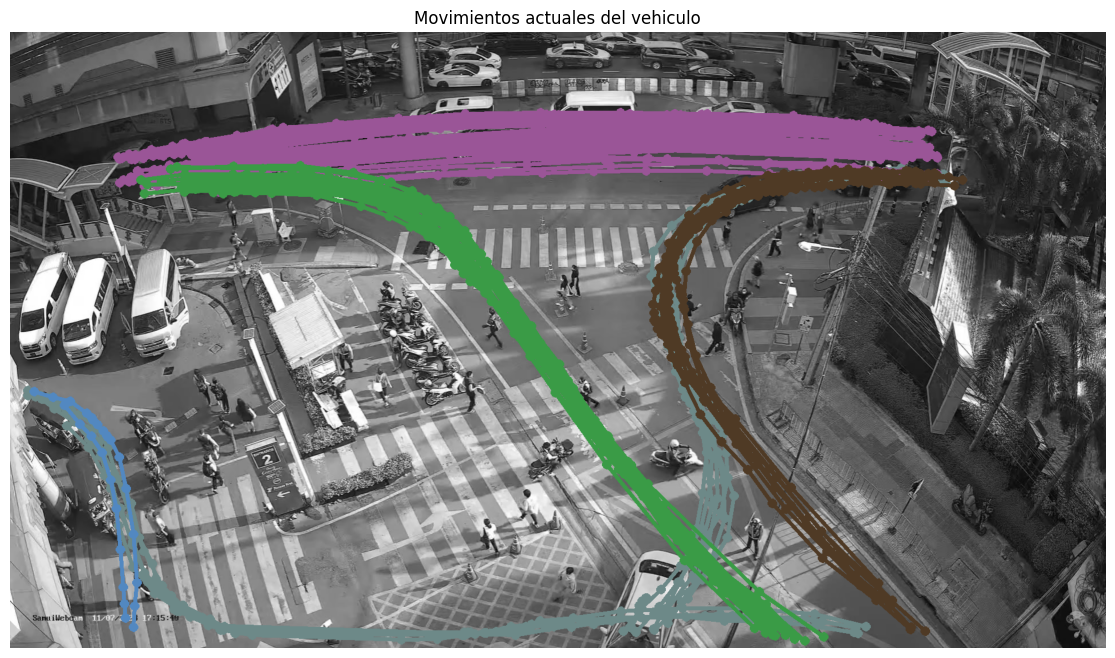

In [14]:
print_graph(k_william.get_clusters, all_lines_saved)
export_graph(k_william.get_clusters, all_lines_saved, all_names_saved)

# hallando media de area poligono de vectores

In [15]:
brothers = k_william.brothers(cluster)
brothers

[0, 1, 2, 67, 105, 83, 84, 21, 20, 151, 152, 147, 27]

In [16]:
lines = []
nombres = []
brothers = k_william.brothers(cluster)
for index in brothers:
    item = all_lines_saved[index]
    lines.append(item)
    nombres.append(all_names_saved[index])

len(lines), len(brothers)

(13, 13)

In [17]:
ruta_imagen = "/serverstorage/dataset_tailandia/Tailandia 001.jpg"

In [18]:
cluster, nombres

(0,
 ['0001',
  '0004',
  '0005',
  '0122',
  '0200',
  '0155',
  '0156',
  '0030',
  '0029',
  '0316',
  '0318',
  '0303',
  '0036'])

In [19]:
len(lines)

13

In [20]:
A = []
A.append(lines[10]) 
A.append(lines[6])

# 4 y 6 y 7 y 10
# 0 y 1 y 2 y 3 y 5 y 8 y 9 y 11 y 12

In [21]:
#!pip install shapely

In [22]:
import matplotlib.pyplot as plt

x_A, y_A = zip(*A[0])
x_B, y_B = zip(*A[1])

# Creamos una figura y ejes para el gráfico
fig, ax = plt.subplots()

# Graficamos los puntos de la lista A[0]
ax.plot(x_A, y_A, marker='o', linestyle='-', color='b', label='Sublista A[0]')

# Graficamos los puntos de la lista A[1]
ax.plot(x_B, y_B, marker='o', linestyle='-', color='g', label='Sublista A[1]')

# Definimos el título y las etiquetas de los ejes
ax.set_title('Dibujo de sublistas A[0] y A[1]')
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')

# Mostramos la leyenda
ax.legend()

# Mostramos el gráfico
plt.show()


In [23]:
#!pip install Polygon3

In [24]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def calcular_area(lista1, lista2):
    # Obtener las coordenadas x e y de cada lista
    x1, y1 = zip(*lista1)
    x2, y2 = zip(*lista2)
    
    # Interpolar ambas listas para obtener funciones continuas
    f1 = interpolate.interp1d(x1, y1, kind='linear', fill_value='extrapolate')
    f2 = interpolate.interp1d(x2, y2, kind='linear', fill_value='extrapolate')
    
    # Crear una nueva lista de puntos para evaluar la diferencia entre las funciones
    x_new = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), 1000)
    
    # Evaluar las funciones en los nuevos puntos
    y1_new = f1(x_new)
    y2_new = f2(x_new)
    
    # Calcular la diferencia entre las dos funciones
    diferencia = y1_new - y2_new
    
    # Calcular el área entre las dos listas utilizando la integración numérica (método del trapecio)
    area = np.trapz(np.abs(diferencia), x_new)
    
    return round(area, 3)

def graficar_con_sombras(lista1, lista2):
    # Obtener las coordenadas x e y de cada lista
    x1, y1 = zip(*lista1)
    x2, y2 = zip(*lista2)
    
    # Interpolar ambas listas para obtener funciones continuas
    f1 = interpolate.interp1d(x1, y1, kind='linear', fill_value='extrapolate')
    f2 = interpolate.interp1d(x2, y2, kind='linear', fill_value='extrapolate')
    
    # Crear una nueva lista de puntos para evaluar la diferencia entre las funciones
    x_new = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), 1000)
    
    # Evaluar las funciones en los nuevos puntos
    y1_new = f1(x_new)
    y2_new = f2(x_new)
    
    # Calcular la diferencia entre las dos funciones
    diferencia = y1_new - y2_new
    
    # Calcular el área entre las dos listas utilizando la integración numérica (método del trapecio)
    area = np.trapz(np.abs(diferencia), x_new)
    
    print("Área entre las dos listas:", area)
    
    # Graficar las dos listas de puntos
    plt.plot(x1, y1, label='Lista 1', marker='o')
    plt.plot(x2, y2, label='Lista 2', marker='o')
    
    # Graficar el área sombreada entre las dos listas
    polygon_points = list(zip(x1, y1)) + list(zip(reversed(x2), reversed(y2)))
    polygon = Polygon(polygon_points, edgecolor='gray', facecolor='gray', alpha=0.5)
    
    
    # Graficar las dos listas de puntos
    plt.plot(x1, y1, label='Lista 1', marker='o')
    plt.plot(x2, y2, label='Lista 2', marker='o')
    
    # Agregar el polígono al gráfico para sombrear el área
    plt.gca().add_patch(polygon)
    
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.legend()
    plt.title('Área entre dos listas de puntos')
    plt.grid(True)
    plt.show()






In [25]:
import numpy as np
from scipy.spatial import procrustes
from scipy import interpolate



def calcular_procrustes(lista1, lista2):
    # Convertir las listas de puntos a matrices numpy
    matriz1 = np.array(lista1)
    matriz2 = np.array(lista2)
    
    # Asegurarse de que ambas matrices tengan la misma cantidad de columnas (2 para coordenadas x e y)
    if matriz1.shape[1] != matriz2.shape[1]:
        print("Las matrices deben tener la misma cantidad de columnas para compararlas.")
    else:
        # Interpolar ambas listas para obtener la misma cantidad de puntos
        cantidad_puntos = 1000
        x1, y1 = matriz1[:, 0], matriz1[:, 1]
        x2, y2 = matriz2[:, 0], matriz2[:, 1]
        f1 = interpolate.interp1d(x1, y1, kind='linear', fill_value='extrapolate')
        f2 = interpolate.interp1d(x2, y2, kind='linear', fill_value='extrapolate')
        x_new = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), cantidad_puntos)
        matriz1_interp = np.column_stack((x_new, f1(x_new)))
        matriz2_interp = np.column_stack((x_new, f2(x_new)))
    
        # Aplicar el algoritmo de Procrustes para obtener la transformación óptima
        mtx1, mtx2, disparidad = procrustes(matriz1_interp, matriz2_interp)
    
        # Calcular la distancia entre las dos formas después de la transformación
        distancia_procrustes = np.sqrt(np.sum((mtx1 - mtx2) ** 2))
    
        
        #print("similares", distancia_procrustes<0.1)

        return round(distancia_procrustes, 5), distancia_procrustes<1.15


In [26]:
len(lines)

13

In [27]:
data_predict = anomalies["0326"]


# 4 y 6 y 7 y 10
# 0 y 1 y 2 y 3 y 5 y 8 y 9 y 11 y 12


# 0 2 3 8 9 11
# 4 5 6 7 10

for i in range(len(lines)-1):
    for j in range(i+1, len(lines)):
        A = []
        A.append(lines[j]) 
        A.append(lines[i]) 

        lista1 = A[1] 
        lista2 = A[0] 

        distancia_procrustes, is_valid = calcular_procrustes(lista1, lista2)
        if is_valid:    
            print(f"Distancia Procrustes entre las dos listas de puntos ({i} - {j}):", distancia_procrustes)
            #graficar_con_sombras(lista1, lista2)
    

Distancia Procrustes entre las dos listas de puntos (0 - 1): 0.66146
Distancia Procrustes entre las dos listas de puntos (0 - 2): 0.0
Distancia Procrustes entre las dos listas de puntos (0 - 3): 0.0
Distancia Procrustes entre las dos listas de puntos (0 - 4): 0.19036
Distancia Procrustes entre las dos listas de puntos (0 - 5): 0.20017
Distancia Procrustes entre las dos listas de puntos (0 - 6): 0.20017
Distancia Procrustes entre las dos listas de puntos (0 - 7): 0.20017
Distancia Procrustes entre las dos listas de puntos (0 - 8): 0.0
Distancia Procrustes entre las dos listas de puntos (0 - 9): 0.0
Distancia Procrustes entre las dos listas de puntos (0 - 10): 0.20017
Distancia Procrustes entre las dos listas de puntos (0 - 11): 0.0
Distancia Procrustes entre las dos listas de puntos (0 - 12): 0.27703
Distancia Procrustes entre las dos listas de puntos (1 - 2): 0.83489
Distancia Procrustes entre las dos listas de puntos (1 - 3): 0.83195
Distancia Procrustes entre las dos listas de puntos

	No anomalia por procruste con punto (4): 0.00796  ->  108.9 True
	No anomalia por procruste con punto (6): 0.00937  ->  106.3 True
	No anomalia por procruste con punto (9): 0.01118  ->  108.0 True
	No anomalia por procruste con punto (15): 0.01069  ->  115.9 True
	No anomalia por procruste con punto (24): 0.00853  ->  106.7 True
	No anomalia por procruste con punto (26): 0.00954  ->  101.7 True
	No anomalia por procruste con punto (30): 0.01301  ->  103.4 True
	No anomalia por procruste con punto (34): 0.00607  ->  112.9 True
	No anomalia por procruste con punto (35): 0.00821  ->  100.7 True
	No anomalia por procruste con punto (45): 0.00919  ->  105.3 True
	No anomalia por procruste con punto (53): 0.01038  ->  109.4 True
	No anomalia por procruste con punto (56): 0.0082  ->  103.2 True
	No anomalia por procruste con punto (62): 0.00793  ->  105.2 True
	No anomalia por procruste con punto (66): 0.00565  ->  100.9 True
	No anomalia por procruste con punto (67): 0.00774  ->  107.1 True

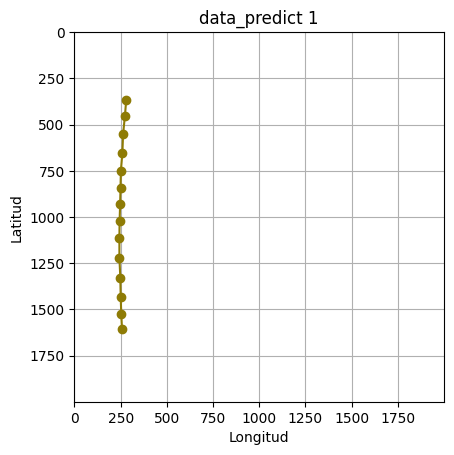

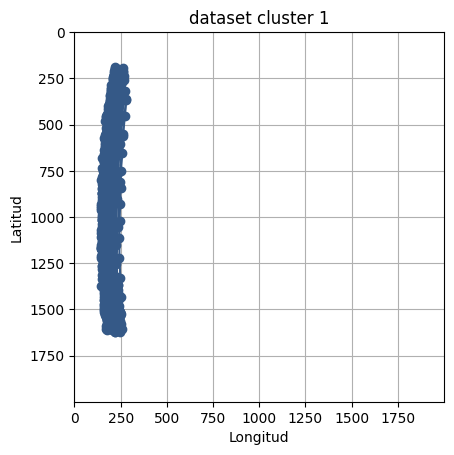

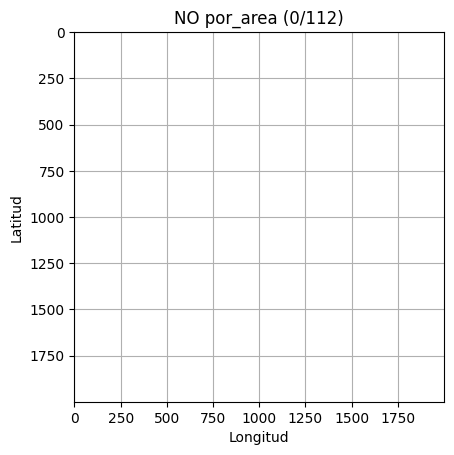

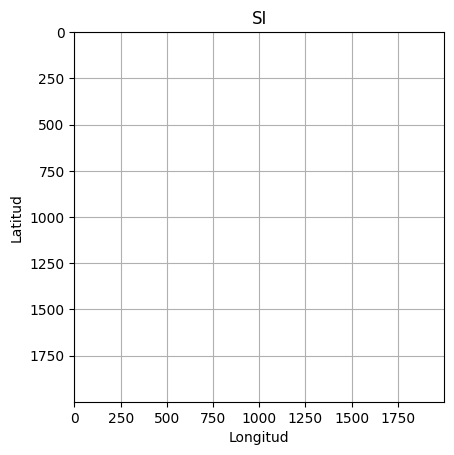

In [28]:
#  0082    0130    0317     0326    0316


index = all_names_saved.index("0261") 
data_predict = all_lines_saved[index]

sensibility = 50.0  # High number = less clusters, low number = more cluster

k_william = ClusterAlgoritmia(sensibility=sensibility)
k_william.train(all_lines_saved)

cluster = k_william.predict([data_predict])[0]
lines = []
nombres = []
brothers = k_william.brothers(cluster)
for index in brothers:
    item = all_lines_saved[index]
    lines.append(item)
    nombres.append(all_names_saved[index])



por_procruste = [data_predict]
por_area = [data_predict]
otros = [data_predict]

for i in range(len(lines)):
    A = []
    A.append(data_predict) 
    A.append(lines[i]) 

    lista1 = A[1] 
    lista2 = A[0] 

    distancia_procrustes, is_valid = calcular_procrustes(lista1, lista2)
    area = calcular_area(lista1, lista2)
    area = round(area/1000, 1)
    if distancia_procrustes<0.15:    
        if area>100:
            print(f"\tNo anomalia por procruste con punto ({i}):", distancia_procrustes, " -> ", area, area>100)
        por_procruste.append(lines[i])
        #graficar_con_sombras(lista1, lista2)
    elif area<100:
        #print(f"\tNo anomalia por area con punto ({i}):", distancia_procrustes, " -> ", area, area>100)
        por_area.append(lines[i])
    else:
        print(f"Distancia Procrustes ({i}):", distancia_procrustes, " -> ", area, area>100)
        otros.append(lines[i])


if len(otros) == 1:
    otros = []

if len(por_procruste) == 1:
    por_procruste = []

if len(por_area) == 1:
    por_area = []

plot_lines_on_map([data_predict], image=5, title=f"data_predict {cluster}")
plot_lines_on_map(lines, image=5, title=f"dataset cluster {cluster}")
plot_lines_on_map(por_procruste, image=5, title=f"NO por_procruste ({len(por_procruste)}/{len(lines)})")
plot_lines_on_map(por_area, image=5, title=f"NO por_area ({len(por_area)}/{len(lines)})")
plot_lines_on_map(otros, image=5, title="SI")

In [29]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Coordenadas de los puntos del polígono
x_A, _ = zip(*A[0])
coords = [(min(x_A), 0)] +  A[0] + [(max(x_A), 0) ]

# Crear el polígono usando Shapely
polygon = Polygon(coords)

# Obtener las coordenadas (x, y) de los puntos del polígono
x, y = polygon.exterior.xy

# Graficar el polígono
plt.plot(x, y)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


class Model_RandomForestClassifier:
    max_puntos = 0

    def __init__(self, names):
        self.names = names
    
    def prepare_train(self, trayectorias):
        # Encontrar el número máximo de puntos en una trayectoria
        max_puntos = max(len(trayectoria) for trayectoria in trayectorias)
        
        # Representar cada trayectoria con puntos de referencia
        puntos_referencia = np.zeros((len(trayectorias), max_puntos, 2))
        for i, trayectoria in enumerate(trayectorias):
            puntos_referencia[i, :len(trayectoria)] = trayectoria
        
        # Aplanar la matriz para entrenar el modelo K-means
        datos_entrenamiento = puntos_referencia.reshape(len(trayectorias), -1)
        self.max_puntos = max_puntos
        return datos_entrenamiento
    
    def prepare_predict(self, nuevas_trayectorias):
        # Representar las nuevas trayectorias con puntos de referencia
        puntos_referencia_nuevas = np.zeros((len(nuevas_trayectorias), self.max_puntos, 2))
        for i, trayectoria in enumerate(nuevas_trayectorias):
            puntos_referencia_nuevas[i, :len(trayectoria)] = trayectoria
        
        # Aplanar la matriz para realizar la predicción con K-means
        datos_prediccion = puntos_referencia_nuevas.reshape(len(nuevas_trayectorias), -1)
        return datos_prediccion    

    def create_model(self):
        # Crear el modelo Random Forest
        modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
        return modelo_rf

    def train(self, X, y):
        X = self.prepare_train(X)
        
        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        modelo_rf = self.create_model()

        # Entrenar el modelo con los datos de entrenamiento
        modelo_rf.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_pred = modelo_rf.predict(X_test)
        
        # Calcular la precisión del modelo
        precision = accuracy_score(y_test, y_pred)
        print(f"Precisión del modelo: {precision:.2f}")
        
        # Mostrar el reporte de clasificación
        reporte_clasificacion = classification_report(y_test, y_pred, target_names=names)

        self.modelo_rf = modelo_rf
        
        return reporte_clasificacion

    def predict(self, new_data):
        datos_prediccion = self.prepare_predict(data_predict)

        # Realizar predicciones en el conjunto de prueba
        y_pred = self.modelo_rf.predict(datos_prediccion)
        return y_pred

In [48]:
k_william = ClusterAlgoritmia(sensibility=50.0)
k_william.train(all_lines_saved)

cluster = k_william.predict([0])

all_clusters = []
for clust, ids_cluster in enumerate(k_william.get_clusters):
    for id_p in ids_cluster:
        all_clusters.append((all_lines_saved[id_p] , clust))  
        
X = [ d[0] for d in all_clusters]
y = [ d[1] for d in all_clusters]
names = [ f"cluster_{n}" for n in range(len(k_william.get_clusters)) ]

No se puede predecir  0


In [49]:
model = Model_RandomForestClassifier(names)

reporte_clasificacion = model.train(X, y)
print("Reporte de clasificación:")
print(reporte_clasificacion)

Precisión del modelo: 0.94
Reporte de clasificación:
              precision    recall  f1-score   support

   cluster_0       0.50      0.50      0.50         2
   cluster_1       1.00      1.00      1.00        21
   cluster_2       0.67      1.00      0.80         2
   cluster_3       1.00      1.00      1.00         6
   cluster_4       0.00      0.00      0.00         1

    accuracy                           0.94        32
   macro avg       0.63      0.70      0.66        32
weighted avg       0.92      0.94      0.93        32



In [50]:
index = all_names_saved.index("0261") 
data_predict = [all_lines_saved[index]]
y_pred = model.predict(data_predict)
y_pred

array([1])

In [30]:
import time

def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Tiempo de ejecución de '{func.__name__}': {elapsed_time:.6f} segundos")
        return result
    return wrapper

In [31]:
import numpy as np
from numba import njit, prange

# Definimos una versión alternativa de la función directed_hausdorff utilizando njit
@njit(parallel=True)
def directed_hausdorff_njit(u, v):
    max_dist = 0.0
    for i in prange(len(u)):
        min_dist = np.inf
        for j in range(len(v)):
            # Cálculo manual de la distancia euclidiana
            dist = np.sqrt((u[i, 0] - v[j, 0]) ** 2 + (u[i, 1] - v[j, 1]) ** 2)
            min_dist = min(min_dist, dist)
        max_dist = max(max_dist, min_dist)
    return max_dist

# Datos de ejemplo
u = np.random.rand(100, 2)
v = np.random.rand(150, 2)

# Llamamos a la función original y a la versión optimizada con njit
from scipy.spatial.distance import directed_hausdorff

def directed_hausdorff_scipy(u, v):
    return directed_hausdorff(u, v)[0]
    

start_time = time.time()
result_scipy = directed_hausdorff_scipy(u, v)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de ejecución de 'directed_hausdorff_scipy': {elapsed_time:.6f} segundos")

start_time = time.time()
result_njit = directed_hausdorff_njit(u, v)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de ejecución de 'directed_hausdorff_njit': {elapsed_time:.6f} segundos")
    
print()
print("Resultado con scipy.spatial.distance.directed_hausdorff:", result_scipy)
print("Resultado con la versión optimizada con njit:", result_njit)


Tiempo de ejecución de 'directed_hausdorff_scipy': 0.000251 segundos
Tiempo de ejecución de 'directed_hausdorff_njit': 0.827178 segundos

Resultado con scipy.spatial.distance.directed_hausdorff: 0.11907399457550516
Resultado con la versión optimizada con njit: 0.11907399457550516


In [32]:
k_william.brothers(0)

[0, 1, 2, 67, 105, 83, 84, 21, 20, 151, 152, 147, 27]

In [33]:
all_lines_saved[5]

[(599, 212), (598, 211), (469, 224), (331, 240)]

In [34]:
k_william = ClusterAlgoritmia(sensibility=50.0)
k_william.train(all_lines_saved)

cluster = k_william.predict([0])
cluster

No se puede predecir  0


[]

In [35]:
all_clusters = []
for clust, ids_cluster in enumerate(k_william.get_clusters):
    for id_p in ids_cluster:
        all_clusters.append((all_lines_saved[id_p] , clust))       
    

In [36]:
len(all_clusters), k_william.get_clusters[0]

(158, [0, 1, 2, 67, 105, 83, 84, 21, 20, 151, 152, 147, 27])

In [37]:
len(all_clusters), len(all_clusters[3])

(158, 2)

In [38]:
len(k_william.get_clusters), len(k_william.get_clusters[3])

(5, 24)

# preparo datos de entrenamiento

In [39]:
trayectorias = all_lines_saved

In [40]:
import numpy as np

# Encontrar el número máximo de puntos en una trayectoria
max_puntos = max(len(trayectoria) for trayectoria in trayectorias)

# Representar cada trayectoria con puntos de referencia
puntos_referencia = np.zeros((len(trayectorias), max_puntos, 2))
for i, trayectoria in enumerate(trayectorias):
    puntos_referencia[i, :len(trayectoria)] = trayectoria

# Aplanar la matriz para entrenar el modelo K-means
datos_entrenamiento = puntos_referencia.reshape(len(trayectorias), -1)

# entreno el modelo

In [41]:
from sklearn.cluster import KMeans

# Número de clusters que queremos encontrar
num_clusters = 3

# Entrenamiento del modelo K-means
modelo_kmeans = KMeans(n_clusters=num_clusters, random_state=42)
modelo_kmeans.fit(datos_entrenamiento)

KMeans(n_clusters=3, random_state=42)

# preparo los datos de predict

In [44]:
index = all_names_saved.index("0261") 
data_predict = all_lines_saved[index]
nuevas_trayectorias = data_predict

# Representar las nuevas trayectorias con puntos de referencia
puntos_referencia_nuevas = np.zeros((len(nuevas_trayectorias), max_puntos, 2))
for i, trayectoria in enumerate(nuevas_trayectorias):
    puntos_referencia_nuevas[i, :len(trayectoria)] = trayectoria

# Aplanar la matriz para realizar la predicción con K-means
datos_prediccion = puntos_referencia_nuevas.reshape(len(nuevas_trayectorias), -1)
datos_prediccion

array([[1604.,  257., 1604., ...,    0.,    0.,    0.],
       [1525.,  253., 1525., ...,    0.,    0.,    0.],
       [1433.,  250., 1433., ...,    0.,    0.,    0.],
       ...,
       [ 551.,  263.,  551., ...,    0.,    0.,    0.],
       [ 451.,  273.,  451., ...,    0.,    0.,    0.],
       [ 365.,  280.,  365., ...,    0.,    0.,    0.]])

# predict

In [45]:
# Predicción de los clusters para las nuevas trayectorias
clusters_predichos = modelo_kmeans.predict(datos_prediccion)

print("Clusters predichos para las nuevas trayectorias:", clusters_predichos)

Clusters predichos para las nuevas trayectorias: [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [46]:
nuevas_trayectorias

[(1604, 257),
 (1525, 253),
 (1433, 250),
 (1330, 248),
 (1220, 243),
 (1114, 243),
 (1022, 244),
 (932, 247),
 (841, 249),
 (749, 251),
 (655, 259),
 (551, 263),
 (451, 273),
 (365, 280)]

In [ ]:
X = [ d[0] for d in all_clusters]
y = [ d[1] for d in all_clusters]
names = [ f"cluster_{n}" for n in range(len(k_william.get_clusters)) ]

In [ ]:
trayectorias = X

# Encontrar el número máximo de puntos en una trayectoria
max_puntos = max(len(trayectoria) for trayectoria in trayectorias)

# Representar cada trayectoria con puntos de referencia
puntos_referencia = np.zeros((len(trayectorias), max_puntos, 2))
for i, trayectoria in enumerate(trayectorias):
    puntos_referencia[i, :len(trayectoria)] = trayectoria

# Aplanar la matriz para entrenar el modelo
datos_entrenamiento = puntos_referencia.reshape(len(trayectorias), -1)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos_entrenamiento, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_rf.fit(X_train, y_train)




In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision:.2f}")

# Mostrar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_pred, target_names=names)
print("Reporte de clasificación:")
print(reporte_clasificacion)

In [ ]:
index = all_names_saved.index("0261") 

In [ ]:

data_predict = all_lines_saved[index]
data_predict

# Representar las nuevas trayectorias con puntos de referencia
puntos_referencia_nuevas = np.zeros((len(nuevas_trayectorias), max_puntos, 2))
for i, trayectoria in enumerate(nuevas_trayectorias):
    puntos_referencia_nuevas[i, :len(trayectoria)] = trayectoria

# Aplanar la matriz para realizar la predicción con K-means
datos_prediccion = puntos_referencia_nuevas.reshape(len(nuevas_trayectorias), -1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(datos_prediccion)
y_pred

In [ ]:
cluster = k_william.predict([data_predict])[0]
cluster

In [ ]:
start_time = time.time()
y_pred = modelo_rf.predict(datos_prediccion)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de ejecución de 'directed_hausdorff_scipy': {elapsed_time:.6f} segundos")

In [ ]:
y_pred = modelo_rf.predict(datos_prediccion)
y_pred